In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Resize all input images to the same size for processing
bg1_image = cv2.imread("./Image data/GreenBackground.png", 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread("./Image data/Object.png", 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread("./Image data/NewBackground.jpg", 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [3]:
def compute_difference(bg_img, input_img):
    difference_single_channel = np.abs(bg_img - input_img)
    return difference_single_channel

(-0.5, 677.5, 380.5, -0.5)

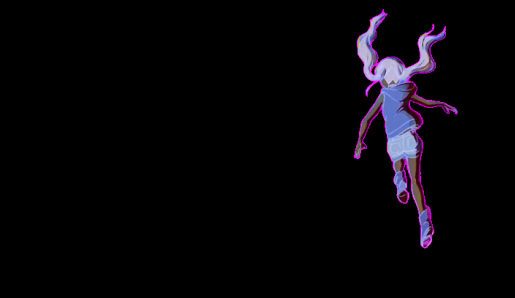

In [4]:
difference_single_channel = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single_channel)
plt.axis("off")

In [5]:
def compute_binary_mask(difference_single_channel):
  # create a binary mask, value = 0 in the background, = 1 in elsewhere having pixel value > 0
  difference_binary = (difference_single_channel > 0).astype(np.uint8)*255
  return difference_binary # return scaled version

(-0.5, 677.5, 380.5, -0.5)

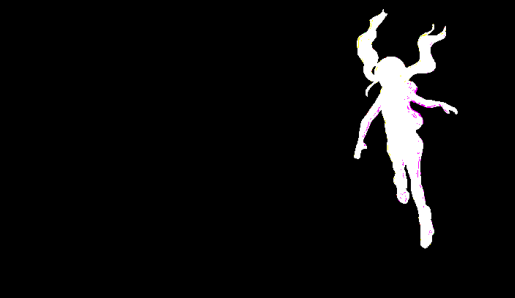

In [6]:
binary_mask = compute_binary_mask(difference_single_channel)
plt.imshow(binary_mask)
plt.axis("off")

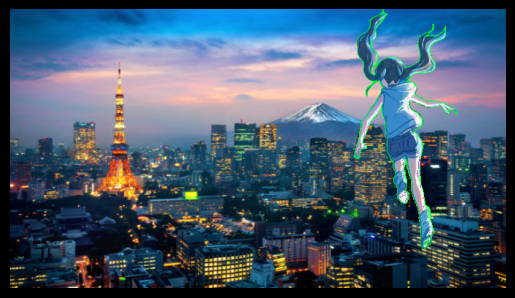

In [8]:
def replace_background(bg1_image, bg2_image, ob_image):
  difference_single_channel = compute_difference(bg1_image, ob_image)
  binary_mask = compute_binary_mask(difference_single_channel)
  output = np.where(binary_mask == 0, bg2_image, ob_image)
  return output


# Display the result
result_image = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(result_image[:,:,::-1])
plt.axis("off")
plt.show()